In [55]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from  sklearn.decomposition import TruncatedSVD
import warnings 
warnings.filterwarnings("ignore")
import csv

In [56]:
data=[]
col_names=[]
with open('songdata.csv',encoding="utf8",newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for itm,row in enumerate(spamreader):
        if itm==0:
            col_names.append(row)
        else:
            data.append(row)

In [57]:
song= [item[1] for item in data]
song[:3]

["Ahe's My Kind Of Girl", 'Andante, Andante', 'As Good As New']

In [58]:
text= [item[3] for item in data]


In [59]:
vect = TfidfVectorizer(min_df =5, stop_words = 'english')
X = vect.fit_transform(text)
X.shape

(57650, 22557)

In [60]:
terms = vect.get_feature_names()

In [61]:
from sklearn.cluster import KMeans

In [62]:
kmeans = KMeans(3)
clusters = kmeans.fit_predict(X)
clusters

array([2, 0, 2, ..., 0, 2, 1])

In [63]:
np.bincount(clusters)

array([14967,  5215, 37468], dtype=int64)

In [64]:
print(kmeans.cluster_centers_)  


[[8.31976631e-06 1.06603492e-04 7.47393364e-06 ... 0.00000000e+00
  1.67727003e-05 0.00000000e+00]
 [0.00000000e+00 1.23488648e-04 0.00000000e+00 ... 0.00000000e+00
  2.03991517e-05 0.00000000e+00]
 [4.71628813e-05 2.11775488e-04 2.37823967e-05 ... 3.75865489e-05
  2.23635178e-05 1.62146361e-05]]


In [65]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 

for i in range(3):
    print("Cluster %d:" % i, end='')
    print()
    index=[]
    documents=[]
    songs=[]
    for ind in order_centroids[i, :5]: #replace 5 with n words per cluster
        index.append(ind)
    
    for j in index:
        documents.append(text[j])
        songs.append(song[j])
    print("Top 5 songs closest to cluster center are:")
    print(songs)
    print() 
    print("Top 5 documents closest to cluster center are:")
    print("%s"%documents)
    print()
       
        

Top terms per cluster:

Cluster 0:
Top 5 songs closest to cluster center are:
['Bed Of Roses', "Hooked On Rock'n'roll", 'I Want To Spend The Night', 'Jillian', 'Scars']

Top 5 documents closest to cluster center are:
["There's something 'bout your manner  \nThat makes it hard to see  \nJust how you take advantage  \nOf a workin' girl like me  \nI've seen you set 'em up  \nAnd I've seen you take 'em down  \nOur love is legal tender  \nFor your kind to pass around  \n  \nDon't want your bed of roses  \nDon't want no handful of thorns  \nDon't want to be your livin' doll  \nDon't want to be no woman scorned  \nI don't want to watch you turn the page  \nWhen our chapter closes  \nNo, I'm not gonna lay me down  \nIn your bed of roses  \n  \nI've tasted good and bad love  \nIn the honky-tonks and bars  \nI've settled for the moon  \nWhen I was reachin' for the stars  \nAnd though sometimes I have stumbled  \nI've been known to fall  \nIt was always true love  \nThat took me to the wall  \n  

# Running LSA with 50 components

In [36]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(50)
Z = lsa.fit_transform(X)
Z.shape

(57650, 50)

In [37]:
vocab = np.array(vect.get_feature_names())

for i in range(Z.shape[1]):
    order = np.abs(lsa.components_[i]).argsort()[::-1]
    print(vocab[order[:5]])

['love' 'don' 'know' 'll' 'just']
['love' 'don' 'got' 'heart' 'gonna']
['oh' 'baby' 'yeah' 'll' 'time']
['oh' 'don' 'want' 'baby' 'know']
['baby' 'don' 'oh' 'want' 'know']
['ll' 'la' 'baby' 'got' 'yeah']
['la' 'll' 'got' 'baby' 'yeah']
['want' 'don' 'yeah' 'know' 've']
['yeah' 'll' 'let' 'gonna' 'want']
['let' 'll' 'want' 'don' 'yeah']
['got' 've' 'let' 'yeah' 'don']
['gonna' 'yeah' 've' 'know' 'oh']
['gonna' 'll' 'christmas' 'yeah' 'like']
['christmas' 'like' 'don' 'chorus' 'got']
['christmas' 'time' 'don' 'come' 'just']
['know' 'chorus' 'christmas' 'away' 'hey']
['come' 'know' 'hey' 'home' 'don']
['hey' 'like' 'say' 'girl' 'feel']
['time' 'chorus' 'hey' 'heart' 'come']
['chorus' 'know' 'wanna' 'come' 'heart']
['time' 'say' 'girl' 'way' 'away']
['hey' 'girl' 'like' 'feel' 'time']
['chorus' 'need' 'hey' 'wanna' 'life']
['night' 'come' 'heart' 'tonight' 'like']
['wanna' 'need' 'feel' 'time' 'life']
['away' 'say' 'girl' 'night' 'tonight']
['need' 'home' 'wanna' 'heart' 'just']
['ve' 'hom

# Finding best number of clusters with elbow method:

In [42]:
inertia = []
for i in range(2, 10):
    kmeans = KMeans(i)
    kmeans.fit_predict(Z)
    inertia.append(kmeans.inertia_)
    
print(inertia)

[7162.2111236617475, 6945.057580486315, 6780.277050320886, 6622.986550868557, 6444.4806821609045, 6336.436640122841, 6228.38721452123, 6158.0943530384375]


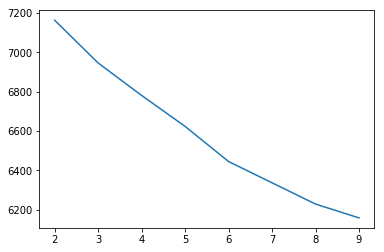

In [43]:
%matplotlib inline

plt.plot(range(2, 10), inertia)

In [44]:
kmeans = KMeans(6)
clusters = kmeans.fit_predict(X)
clusters

array([0, 5, 0, ..., 5, 0, 5])

In [45]:
np.bincount(clusters)

array([33448,  4508,  2499,  2407,   362, 14426], dtype=int64)

In [47]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 

for i in range(6):
    print("Cluster %d:" % i, end='')
    print()
    index=[]
    documents=[]
    songs=[]
    for ind in order_centroids[i, :5]: #replace 5 with n words per cluster
        index.append(ind)
    
    for j in index:
        documents.append(text[j])
        songs.append(song[j])
    print("Top 5 songs closest to cluster center are:")
    print(songs)
    print() 
    #print("Top 5 documents closest to cluster center are:")
    #print(documents)
    print()
       

Top terms per cluster:

Cluster 0:
Top 5 songs closest to cluster center are:
['Long Night', 'Superstition', 'Prozakc Blues', "Aren't You The One?", 'Hold My Hand']


Cluster 1:
Top 5 songs closest to cluster center are:
["Aren't You The One?", 'THE NIGHT', "Hooked On Rock'n'roll", 'Superstition', 'Bed Of Roses']


Cluster 2:
Top 5 songs closest to cluster center are:
['I Want To Spend The Night', "Aren't You The One?", 'Bed Of Roses', 'Jillian', 'Scars']


Cluster 3:
Top 5 songs closest to cluster center are:
['Scars', 'The La La Song', "Aren't You The One?", "Hooked On Rock'n'roll", 'Bed Of Roses']


Cluster 4:
Top 5 songs closest to cluster center are:
['Here It Comes Again', 'Scars', "Aren't You The One?", 'The Adventures Of Rain Dance Maggie', 'Bed Of Roses']


Cluster 5:
Top 5 songs closest to cluster center are:
['Bed Of Roses', "Hooked On Rock'n'roll", 'Jillian', 'Prozakc Blues', 'Superstition']




In [49]:
from sklearn.decomposition import PCA

pca = PCA(2)
Z1 = pca.fit_transform(X.todense())
Z1.shape

(57650, 2)

In [50]:
kmeans = KMeans(3)
clusters = kmeans.fit_predict(Z1)
clusters

array([0, 2, 0, ..., 2, 0, 1])

In [51]:
print(kmeans.cluster_centers_)  

[[-0.05152793  0.01304575]
 [ 0.17224828  0.13097291]
 [ 0.07261769 -0.08960331]]


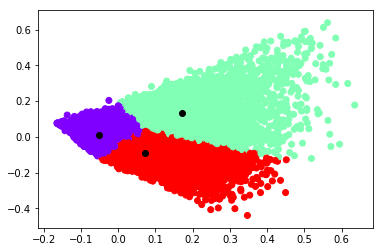

In [54]:
plt.scatter(Z1[:,0],Z1[:,1], c = kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')  
plt.show()